In [25]:
"""
This is an example of linearly classifying the simple data points co-ordinates using support vector machine.
Training,Accuracy, Performance, and Prediction are explained in detail. 
"""

'\nThis is an example of linearly classifying the simple data points co-ordinates using support vector machine.\nTraining,Accuracy, Performance, and Prediction are explained in detail. \n'

In [23]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
from sklearn.model_selection import train_test_split

In [1]:
# Plotting data points
def plot_data(x_train,y_train):
    id_xPlus = y_train[y_train > 0].index
    id_xMinus = y_train[y_train < 0].index
    plt.scatter(x_train[id_xMinus, 0], x_train[id_xMinus, 1], c='g', s=50)
    plt.scatter(x_train[id_xPlus, 0], x_train[id_xPlus, 1], c='b', s=50)
    plt.legend(target_boundaries, loc=2)
    plt.xlabel("X1")
    plt.xlabel("X2")
    return plt

In [4]:
# SVM for linearly separable data
data = pd.read_csv("DataSet1.csv")
print(data)

         X1        X2  Y
0  2.947814  6.868780  1
1  2.530388  7.785050  1
2  3.566991  5.651046  1
3  3.156983  5.467077  1
4  2.582346  4.457777 -1
5  2.155826  6.222343 -1
6  3.273418  3.520687 -1


In [5]:
# Data Preparation
X1 = data['X1']
X2 = data['X2']
x_train = np.array(list(zip(X1,X2)))
y_train = data['Y']
print(x_train)
print(y_train)

[[2.947814 6.86878 ]
 [2.530388 7.78505 ]
 [3.566991 5.651046]
 [3.156983 5.467077]
 [2.582346 4.457777]
 [2.155826 6.222343]
 [3.273418 3.520687]]
0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: Y, dtype: int64


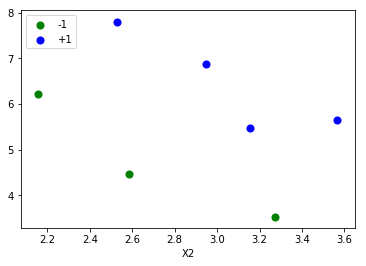

In [6]:
# Define target boundaries
target_boundaries = ['-1', '+1']

# Plotting the data
plt = plot_data(x_train,y_train)
plt.show()

In [7]:
# Define and use VSC we need to define model kernel
SVC = svm.SVC(kernel='linear').fit(x_train,y_train)
print(SVC)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [8]:
# Inside parameters of the model are seen using get_params()
print(SVC.get_params(True))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [9]:
# Lets define Lower and upper boundary for X1 and X2
lbx1 = math.floor(min(x_train[:,0]) -1)
ubx1 = math.ceil(max(x_train[:,0]) +1)
lbx2 = math.floor(min(x_train[:,1]) -1)
ubx2 = math.ceil(max(x_train[:,1]) +1)
print([lbx1,ubx1,lbx2,ubx2])

[1, 5, 2, 9]


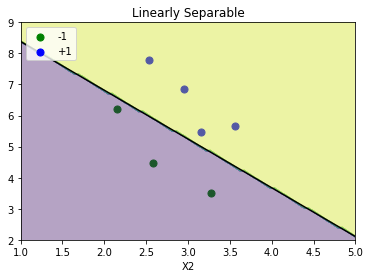

In [10]:
# Plot data
plt = plot_data(x_train,y_train)

# Creating  the decision line / Hyperplane
X,Y = np.mgrid[lbx1:ubx1:100j,lbx2:ubx2:100j]
Z = SVC.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.title('Linearly Separable')
plt.show()

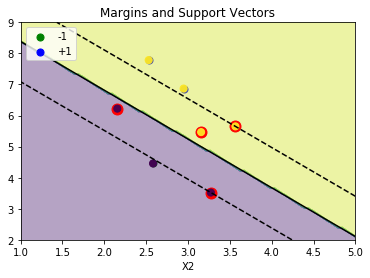

In [11]:
# Creating boundaries or margins
plt = plot_data(x_train,y_train)
# Creating  the decision line / Hyperplane
X,Y = np.mgrid[lbx1:ubx1:100j,lbx2:ubx2:100j]
Z = SVC.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(SVC.support_vectors_[:,0],SVC.support_vectors_[:,1],s=120,facecolors='r')
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=50,alpha=0.95)
plt.title("Margins and Support Vectors")
plt.show()

In [12]:
# Displaying the number of support vectors, support vector indices, support vectors
print("Number of support vectors= {}".format(SVC.n_support_))
print("Support vector indices= {}".format(SVC.support_))
print("Support vectors= {}".format(SVC.support_vectors_))

Number of support vectors= [2 2]
Support vector indices= [5 6 2 3]
Support vectors= [[2.155826 6.222343]
 [3.273418 3.520687]
 [3.566991 5.651046]
 [3.156983 5.467077]]


In [17]:
# Performance testing
print("Performance score= {}".format(SVC.score(x_train,y_train)))
# Alternate
y_pred = SVC.predict(x_train)
print("Prediction of Y= {}".format(y_pred))
y_results = y_train
print("Result [ ] = {}".format(y_results))

Performance score= 1.0
Prediction of Y= [ 1  1  1  1 -1 -1 -1]
Result [ ] = 0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
Name: Y, dtype: int64


In [18]:
# Accuracy testing
metric.accuracy_score(y_results,y_pred,normalize=False)


7

In [19]:
# We can use confusion matrix to check results mis-classification
cnf_matrix = metric.confusion_matrix(y_results,y_pred)
print(cnf_matrix)

[[3 0]
 [0 4]]


In [19]:
# SVM prediction on unseen data
# unseen data [2,7]
SVC.predict([[2,7]])

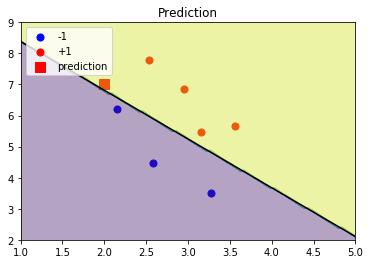

In [21]:
# Plotting the prediction of unseen data
idxPlus=y_train[y_train<0].index
idxMin=y_train[y_train>0].index
plt.scatter(x_train[idxPlus,0],x_train[idxPlus,1],c='b',s=50)
plt.scatter(x_train[idxMin,0],x_train[idxMin,1],c='r',s=50)
plt.scatter(2,7,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)
X,Y = np.mgrid[lbx1:ubx1:100j,lbx2:ubx2:100j]
Z = SVC.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])
plt.title('Prediction')
plt.show()

In [22]:
"""
Conclusion: The hyperplane classifies the data points linearly into two classes.
The data point which are touching the boundary range -1 to +1 are called support vectors.
"""

'\nConclusion: The hyperplane classifies the data points linearly into two classes.\nThe data point which are touching the boundary range -1 to +1 are called support vectors.\n'